# Undersøk korpus med metadata

Notebook for å undersøke korpus med metadata


In [1]:
import nbtext as nb
from nbtext import Corpus
%matplotlib inline

In [2]:
frank =nb.get_urn({'title':'%frankenstein%', 'author':"%shelley%"})

In [3]:
frank

[[2015052808135, 'Shelley, Mary Wollstonecraft', 'Frankenstein', 1976],
 [2008022000084, 'Shelley, Mary Wollstonecraft', 'Frankenstein', 1995],
 [2008011101010, 'Shelley, Mary Wollstonecraft', 'Frankenstein', 1993]]

In [19]:
franken_navn  = nb.navn(frank[1])
franken_navn = {n:franken_navn[n] for n in franken_navn if franken_navn[n] > 4}
print([x for x in franken_navn])

['Jeg', 'De', 'Elizabeth', 'Dem', 'Deres', 'Det', 'Justine', 'Felix', 'Clerval', 'Men', 'Genéve', 'Min', 'Da', 'Frankenstein', 'Victor', 'I', 'KAPITEL', 'Dette', 'Du', 'Henry', 'M', 'Vi', 'William', 'England', 'Og', 'Safie', 'Etter', 'Mens', 'Agatha', 'En', 'Den', 'Gud', 'Disse', 'Hun', 'Ingolstadt', 'Slik', 'Elizabeths', 'Ernest', 'Han', 'Mont', 'Hvis', 'Margaret', 'Mr', 'Sveits', 'Til', 'Paris', 'Shelley', 'Akk', 'Er', 'Himmelen', 'Lacey', 'London', 'Nå', 'På', 'Agrippa', 'Din', 'Fra', 'Hvor', 'Intet', 'Moritz', 'Walton', 'Beaufort', 'Blanc', 'Livorno', 'Mitt', 'Så', 'Clervals', 'Cornelius', 'Gode', 'Hans', 'Her', 'Hvordan', 'Hvorfor', 'Italia', 'Mine', 'Nei', 'Neste', 'Oxford', 'Rhinen']


In [147]:
fnavn = [ 'Elizabeth', 'Justine', 'Felix', 'Clerval', 'din', 'vesenet','Gud', 'Guds','skapningen', 'skapning', 'vesen', 
         'monster', 'Victor',  'Henry',  'William',  'Safie',  'Agatha',  'Elizabeths', 'Ernest',   'Margaret',  'Frankenstein', 'Lacey',  'Agrippa', 'Moritz', 'Walton', 'Beaufort', 'Clervals', 'Cornelius']

In [141]:
frank[1]

[2008022000084, 'Shelley, Mary Wollstonecraft', 'Frankenstein', 1995]

In [119]:
fwords = nb.get_freq(frank[2][0], top=150000, cutoff=1)

In [136]:
fwords['vesen']

43

In [33]:
nb.make_network_graph??

In [148]:
network = nb.make_network(frank[2], fnavn)

True

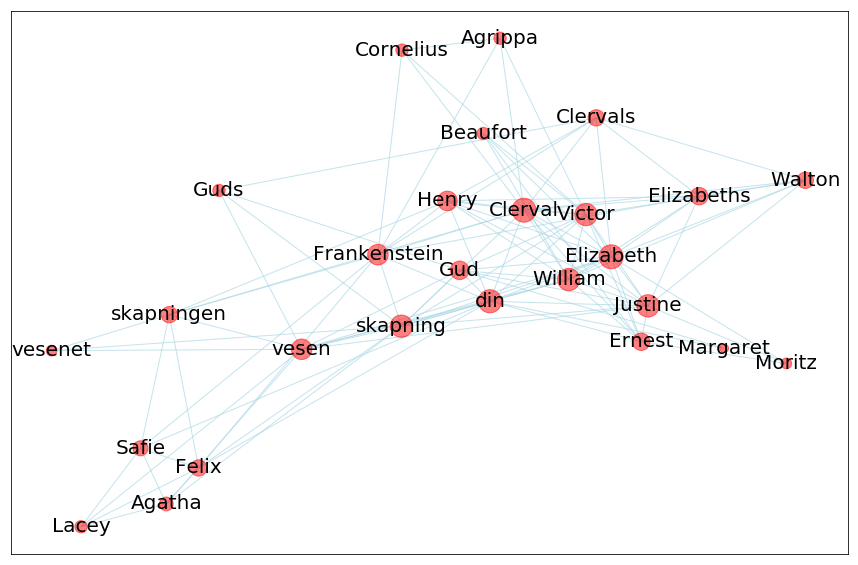

In [149]:
nb.draw_graph_centrality(network, k=0.5)

In [129]:
nb.central_betweenness_characters(network)

[('skapning', 0.13273152787285716),
 ('Clerval', 0.12416202109861393),
 ('Frankenstein', 0.11981587860121094),
 ('Elizabeth', 0.11006948417567212),
 ('vesen', 0.096792377189627),
 ('Victor', 0.06849066532030627),
 ('Justine', 0.06146058607097568),
 ('skapningen', 0.05360254478283508),
 ('William', 0.05116458888422218),
 ('Henry', 0.02694867111215469)]

In [130]:
nb.central_characters(network)

[('Clerval', 0.6363636363636364),
 ('Elizabeth', 0.5909090909090909),
 ('Victor', 0.5),
 ('William', 0.5),
 ('Justine', 0.5),
 ('skapning', 0.4545454545454546),
 ('Frankenstein', 0.4545454545454546),
 ('Henry', 0.4090909090909091),
 ('vesen', 0.36363636363636365),
 ('Elizabeths', 0.36363636363636365)]


<h3> <span style="color:gray;font-family:'Comic Sans MS';">
Hva som gjøres
</span></h3><br>
<div style="font-family:'Palatino Linotype';font-size:1.2em">
<p>Her bygges korpuset med et implisitt sammenligningskorpus, eller referansekorpus. Målkorpuset er begrenset til periode (*period*) og de andre parametrene som forfatter (*author*), Dewey (*ddk*) og emneord (*subject*). Referansekorpuset er et vilkårlig utvalg av tekster fra samme periode.</p>

</span></h3>
</div>

In [2]:
objekt = Corpus(
    period=(1950, 2010),
    title='%',
    subject='krig',
    ddk='%',
    reference=50,
    max_books=50)

## Undersøk forskjeller

Dataene viser forskjellem mellom målkorpus og referanse. Se på differansen med kommandoen *difference* som tar et sett parametre. De viktigste for analysen er *freq_exp* som vekter frekvensen til ordene i målkorpuset, og *doc_exp* som vekter dokumentfrekvensen i målkorpuset.

Settes verdien for *top* lik null får du hele korpuset.


In [3]:
objekt.difference(top=10, aslist=False, freq_exp=1.1, doc_exp=1.5)

diff
krig       0.028206
krigen     0.026703
soldater   0.023861
fred       0.023027
hun        0.022360
soldatene  0.021721
militære   0.021165
lille      0.020970
Jeg        0.020896
soldat     0.020778

In [4]:
objekt.difference(top=150)

<h3> <span style="color:gray;font-family:'Arial';">
Metadata for objektet
</span></h3><br><div style="font-family:'Palatino Linotype';font-size:1.2em">
<p>Objektet bærer med seg informasjon om hva det består av. Bruk *objekt.summary()* for å inspisere</p>

</span></h3>
</div>

In [5]:
objekt.summary()

{'parameters': {'author': '%',
  'ddk': '%',
  'limit': 50,
  'next': 60,
  'reference': 50,
  'subject': 'krig',
  'title': '%',
  'year': 1950},
 'reference urn': [2014032408157,
  2011102608073,
  2012092608145,
  2014070907006,
  2014100108152,
  2007031501073,
  2016042108122,
  2011092306085,
  2011102805100,
  2011072108072],
 'target_urn': [2014022808362,
  2011032208128,
  2008070400048,
  2012102306019,
  2007111304069,
  2014110607575,
  2012121007095,
  2015072408083,
  2011050508008,
  2013010705092]}

### Søk etter sett av ord i clustret

Finn verdien for ord i clusteret med objekt.check_words('o1 o2 o3 ... oN') med opsjonell spesifikasjon av eksponent. Bare list ordene opp med mellomrom, ord som ikke er i clusteret vil heller ikke vises. Alle andre vises med assosiasjonsverdien og sorteres var høy til lav. Tittel på kolonnen gir en påminnelse om ordet listen er kollokert fra.

In [6]:
objekt.search_words( 'sår krig . , gevær våpen generaler soldater blod fattigdom nød')

diff
krig       0.573108
soldater   0.542003
våpen      0.472718
gevær      0.333840
nød        0.306214
fattigdom  0.282014
,          0.260247
.          0.247957
blod       0.227647
sår        0.142619

## Dataene kan lagres for å hentes frem igjen. Nyttig for å dele data eller for å gjøre dem tilgjengelig for andre analyseredskaper


Spesifiser et filnavn, eller la det stå åpent. I så fall bygges filnavnet fra ordet og perioden. Filen lagres i samme mappe som notebooken.

In [7]:
objekt.save('korpus_test.json')

True

Last inn det lagrede korpuset og underøk det på samme måte som for ferskbyggede. Bruk *nytt_objekt = Corpus(filename='filavn')*, bytt gjerne ut *nytt_objekt* med et mer deskriptivt navn.

In [8]:
nytt_objekt = Corpus(filename='korpus_test.json')



Sjekk at *nytt_objekt* gjør det samme som det opprinnelige korpuset.

In [9]:
nytt_objekt.difference()

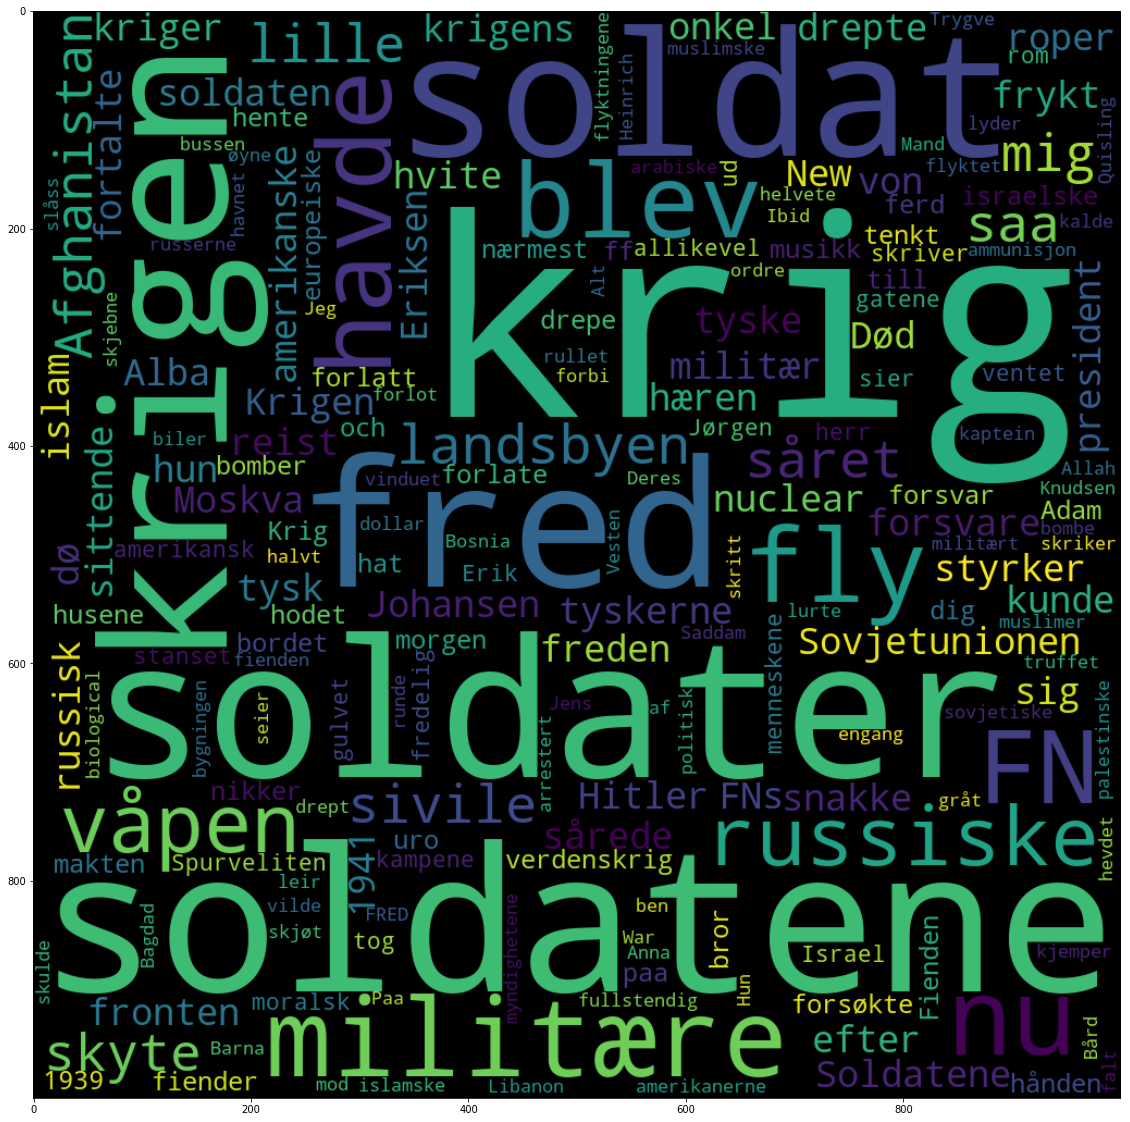

In [10]:
nb.cloud(nytt_objekt.difference(aslist=False))